# Download data

In [ ]:
!gdown --id 1G9nJK_WDpf2mNEr3vX0xz3HEMpR74cX3
!gdown --id 1Q2CSzEKyX9N9ZDPSOXyURQVl7F6KYuls

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1G9nJK_WDpf2mNEr3vX0xz3HEMpR74cX3
To: /content/KHRM_test.csv
100% 194k/194k [00:00<00:00, 103MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q2CSzEKyX9N9ZDPSOXyURQVl7F6KYuls
To: /content/KHRM_train.csv
100% 778k/778k [00:00<00:00, 111MB/s]


# Import lib

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings  # những warning sẽ không được hiển thị
warnings.filterwarnings('ignore')

In [ ]:
# read file
df_train = pd.read_csv('KHRM_train.csv')
df_test = pd.read_csv('KHRM_test.csv')

df_train.shape, df_test.shape

((5634, 21), (1409, 21))

In [ ]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5849-ASHZJ,Male,0,No,Yes,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,552.9,No
1,4745-LSPLO,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.50,20.5,Yes
2,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.8,No
3,1173-NOEYG,Female,0,Yes,No,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),90.15,2423.4,No
4,4143-OOBWZ,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.3,Yes


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 



- có 3 cột mang giá trị số: totalcharges, monthlycharges và tenure
- có 16 cột mang giá trị string (Yes/No): còn lại (ngoại trừ Churn(label) và IDcustomer)


In [ ]:
df_train.isnull().values.any() # Cách thứ 2 để kiểm tra null

False

In [ ]:
# vì dữ liệu trong cột string nếu không đóng góp bất cứ điều gì cho công ty, sẽ là giá trị khoảng trắng

# điều đó đồng nghĩa không đóng góp == 0.
df_train['TotalCharges'] = df_train['TotalCharges'].replace(" ", 0).astype('float32')

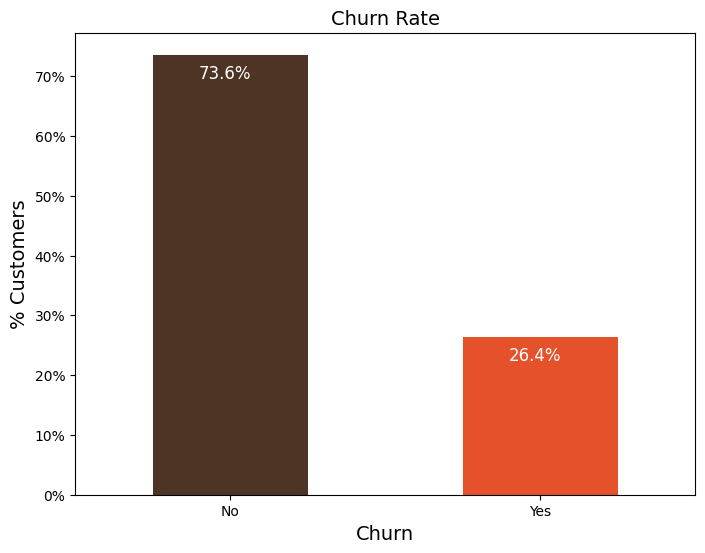

In [ ]:
# tỉ lệ của label (churn và not churn)
import matplotlib.ticker as mtick

colors = ['#4D3425','#E4512B']
ax = (df_train['Churn'].value_counts()*100.0 /len(df_train)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))

#Định dạng trục y của biểu đồ thành định dạng phần trăm
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white')

<Axes: ylabel='Churn'>

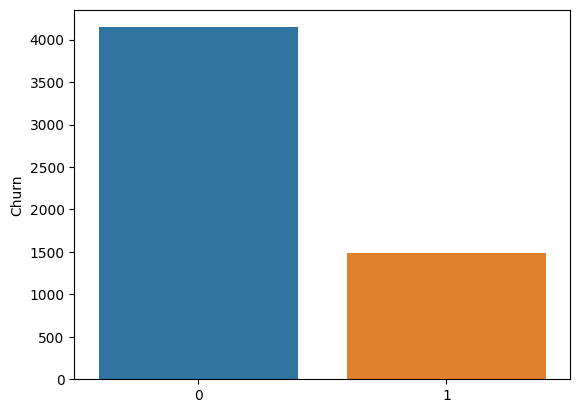

In [ ]:
sns.barplot(y=df_train['Churn'].value_counts(sort=False), x=[0,1])

<Axes: ylabel='Churn'>

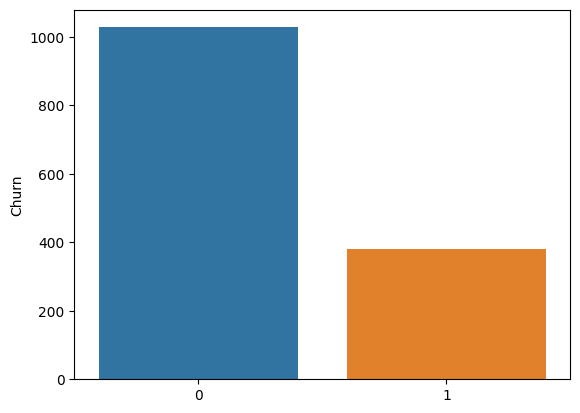

In [ ]:
sns.barplot(y=df_test['Churn'].value_counts(sort=False), x=[0,1])

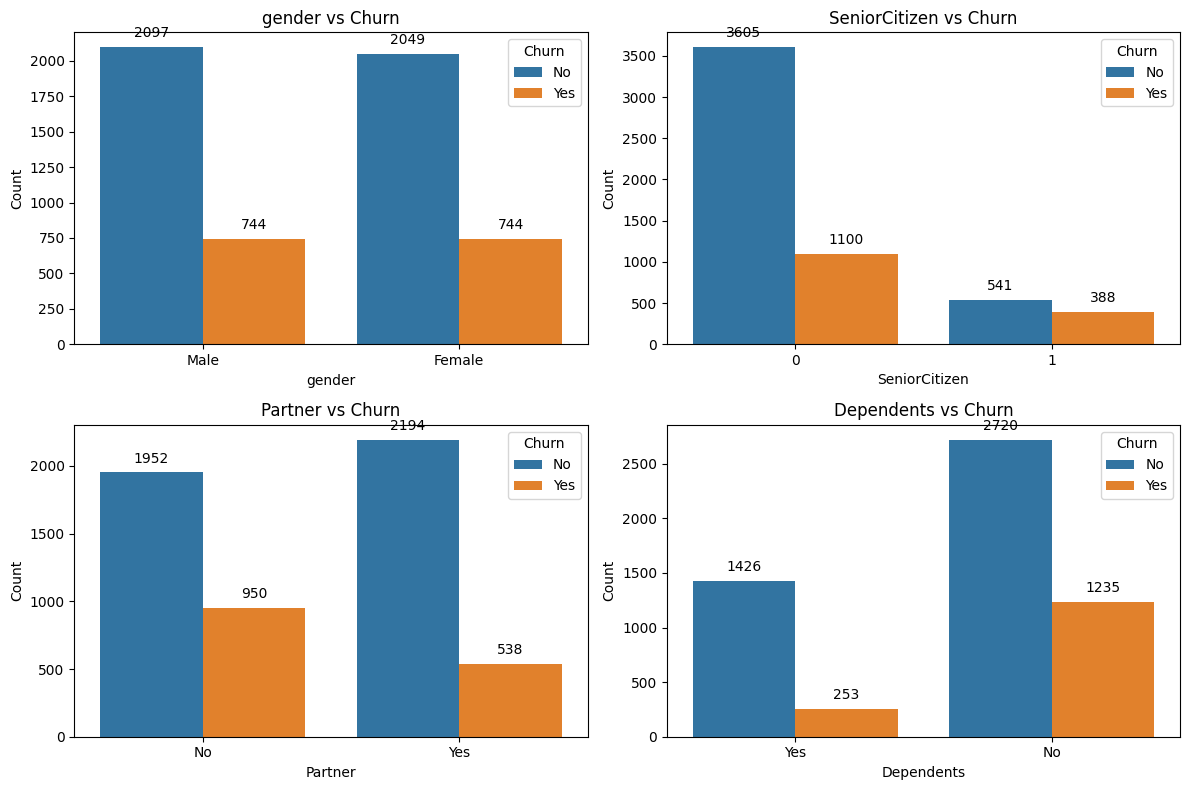

In [ ]:
plt.figure(figsize=(12, 8))
customer_info = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i, feature in enumerate(customer_info, start=1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=df_train, x=feature, hue='Churn')
    plt.title(f'{feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Add count values on top of bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
df_train.drop(columns = ['customerID'], inplace=True)
df_train.drop(columns = ['gender'], inplace=True)

In [ ]:
df_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,Yes,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,552.900024,No
1,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.50,20.500000,Yes
2,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.799999,No
3,0,Yes,No,27,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),90.15,2423.399902,No
4,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.299988,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,No,No,22,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Mailed check,84.30,1855.650024,Yes
5630,1,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.00,86.000000,Yes
5631,0,Yes,No,18,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,74.80,1438.050049,No
5632,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.199951,No


# Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder


#quá trình labeling, chuyển các loại, từ string sang số
le = LabelEncoder()

text_data_features = [i for i in list(df_train.columns) if i not in list(df_train.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df_train[i] = le.fit_transform(df_train[i])
    print(i,' : ',df_train[i].unique(),' = ',le.inverse_transform(df_train[i].unique()))

Label Encoder Transformation
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [1 0]  =  ['Yes' 'No']
PhoneService  :  [1 0]  =  ['Yes' 'No']
MultipleLines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
InternetService  :  [2 1 0]  =  ['No' 'Fiber optic' 'DSL']
OnlineSecurity  :  [1 0 2]  =  ['No internet service' 'No' 'Yes']
OnlineBackup  :  [1 0 2]  =  ['No internet service' 'No' 'Yes']
DeviceProtection  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
TechSupport  :  [1 0 2]  =  ['No internet service' 'No' 'Yes']
StreamingTV  :  [1 0 2]  =  ['No internet service' 'No' 'Yes']
StreamingMovies  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
Contract  :  [1 0 2]  =  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling  :  [0 1]  =  ['No' 'Yes']
PaymentMethod  :  [1 3 0 2]  =  ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check']
Churn  :  [0 1]  =  ['No' 'Yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder


#quá trình labeling, chuyển các loại, từ string sang số
le = LabelEncoder()

text_data_features = [i for i in list(df_test.columns) if i not in list(df_test.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df_test[i] = le.fit_transform(df_test[i])
    print(i,' : ',df_test[i].unique(),' = ',le.inverse_transform(df_test[i].unique()))

Label Encoder Transformation
customerID  :  [ 563  285  288 ... 1269   70  480]  =  ['3896-ZVNET' '2067-QYTCF' '2075-RMJIK' ... '8920-NAVAY' '0485-ZBSLN'
 '3323-CPBWR']
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [1 0]  =  ['Yes' 'No']
PhoneService  :  [1 0]  =  ['Yes' 'No']
MultipleLines  :  [2 0 1]  =  ['Yes' 'No' 'No phone service']
InternetService  :  [2 1 0]  =  ['No' 'Fiber optic' 'DSL']
OnlineSecurity  :  [1 0 2]  =  ['No internet service' 'No' 'Yes']
OnlineBackup  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
DeviceProtection  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
TechSupport  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
StreamingTV  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
StreamingMovies  :  [1 2 0]  =  ['No internet service' 'Yes' 'No']
Contract  :  [2 0 1]  =  ['Two year' 'Month-to-month' 'One year']
PaperlessBilling  :  [0 1]  =  ['No' 'Yes']
PaymentMethod  :  [3 2 0 1]  =  ['Mailed check' 'Electron

In [ ]:
df_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,27,1,0,2,1,1,1,1,1,1,1,0,1,20.05,552.900024,0
1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.50,20.500000,1
2,0,1,1,1,1,0,2,1,1,1,1,1,1,1,0,3,18.80,18.799999,0
3,0,1,0,27,1,2,1,0,0,2,0,0,2,0,0,0,90.15,2423.399902,0
4,0,1,0,5,1,2,1,0,2,0,0,0,0,0,1,2,81.30,416.299988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,0,22,1,0,1,0,2,0,0,0,2,0,1,3,84.30,1855.650024,1
5630,1,0,0,1,1,0,1,0,2,0,0,0,2,0,1,2,86.00,86.000000,1
5631,0,1,0,18,1,0,1,2,0,0,0,0,0,0,0,2,74.80,1438.050049,0
5632,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.199951,0


# Normalize data

In [ ]:
y = df_train['Churn'].values
X = df_train.drop(columns = ['Churn'])

In [ ]:
df_test.drop(columns = ['customerID'], inplace=True)
df_test.drop(columns = ['gender'], inplace=True)

In [ ]:
X.shape, y.shape

((5634, 18), (5634,))

In [ ]:
y_test = df_test['Churn'].values
X_test = df_test.drop(columns = ['Churn'])

X_test.shape, y_test.shape

((1409, 18), (1409,))

# Train

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.7955997161107168

In [ ]:
cnf_matrix = confusion_matrix(y_pred, y_test)
cnf_matrix

array([[927, 187],
       [101, 194]])

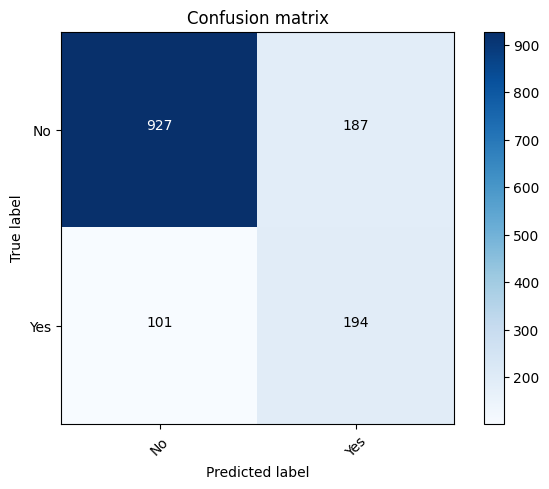

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['No', 'Yes']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')


plt.show()

# Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
model = LogisticRegression()
selector = RFE(model, n_features_to_select=9, step=1)
selector = selector.fit(X, y)

In [ ]:
selector.feature_names_in_

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [ ]:
selector.support_

array([ True, False,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False,  True,  True, False, False, False])

In [ ]:
y_pred = selector.predict(X_test)
accuracy_score(y_pred, y_test)

0.7757274662881476

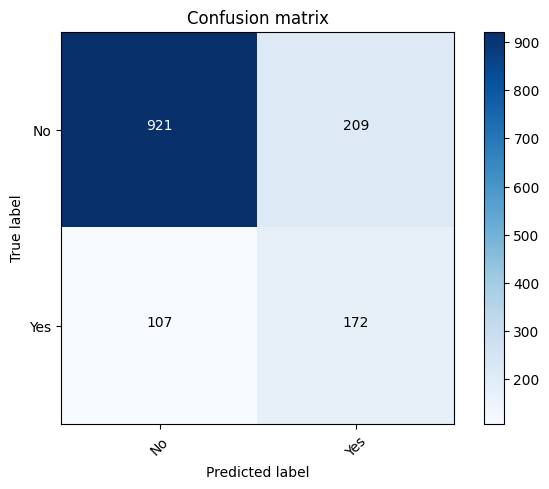

In [ ]:
cnf_matrix = confusion_matrix(y_pred, y_test)
class_names = ['No', 'Yes']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')


plt.show()

# Vét cạn

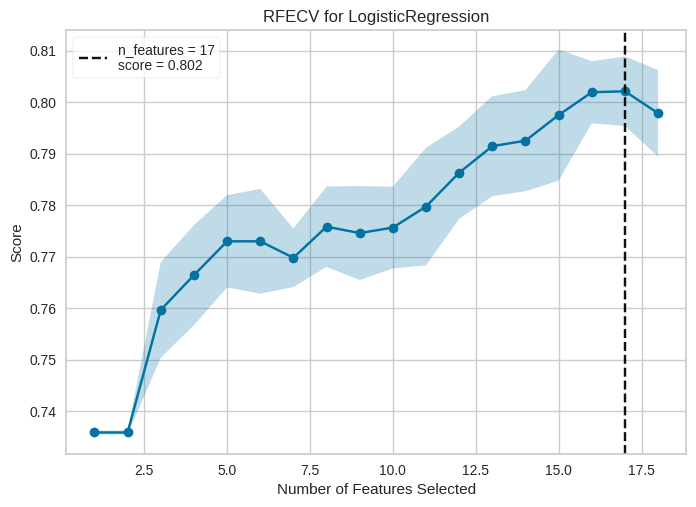

<Axes: title={'center': 'RFECV for LogisticRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import RFECV

visualizer = RFECV(LogisticRegression())

visualizer.fit(X, y)
visualizer.show()

In [ ]:
visualizer.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [ ]:
model = LogisticRegression(class_weight="balanced")
selector = RFE(model, n_features_to_select=17, step=1)
selector = selector.fit(X, y)

In [ ]:
selector.feature_names_in_

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [ ]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False])

In [ ]:
y_pred = selector.predict(X_test)
accuracy_score(y_pred, y_test)

0.7359829666430092

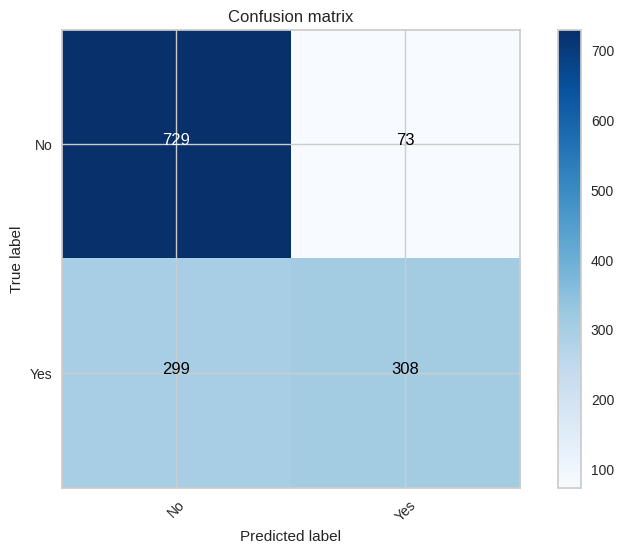

In [ ]:
cnf_matrix = confusion_matrix(y_pred, y_test)
class_names = ['No', 'Yes']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')


plt.show()